# Momentum and vorticity balance diagnostics - figures

In this notebook, we show:

* All terms of each momentum and vorticity balance, expressed in terms of horizontal transport balances by isolating the physical Coriolis force (momentum balances) or beta effect (vorticity balances)
* For each equation, the main dynamical balances, both at the grid scale and at large scale
* The relation between the depth-dependent and depth-integral momentum/vorticity balances

# 1. Preliminary settings

## Required modules and methods

In [1]:
# General:
%load_ext autoreload
%autoreload
import numpy as np
import xarray as xr
import sys
import os

# Plots
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Specific to the VoBiN package:
sys.path.append(os.path.abspath("../output"))
sys.path.append(os.path.abspath("../lib"))
from plot_methods import global_map,vertical_section
from general_methods import norm,log10
from grid_methods import zint,search_lon,ubot,ucline

## Loading the data

In [2]:
names=['meshmask','utrd','utrd2','ztrd','ztrd2','ztrd_int','ztrd2_int','utrd2_int','utrd2_av','utrd2_transp',
       'utrd_int','utrd_av','utrd_transp','curl_utrd_int','curl_utrd2_int','curl_utrd_av','curl_utrd2_av',
       'curl_utrd_transp','curl_utrd2_transp','balances','balances_s']
for name in names:
    exec(name+'=xr.open_dataset("../output/'+name+'.nc")')

# derivation of |u|, bottom |u| and a |u|-cline from (u,v) for interpretation purposes
u_norm=norm(utrd2.u,utrd2.v)
u_int=norm(zint(utrd2.u,meshmask.e3u_0),zint(utrd2.v,meshmask.e3v_0))
u_bot=ubot(u_norm,meshmask)
u_cline=ucline(u_norm,meshmask)

/usr/lib64/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


# 2. All terms of each balance

In [3]:
# Figure properties:
x=meshmask.fixed_glamt; x[-1,:]=x[-2,:]
y=meshmask.gphit
colorbar='plasma'
projection='Robinson'
rho0=1025

## Depth-dependent momentum equation

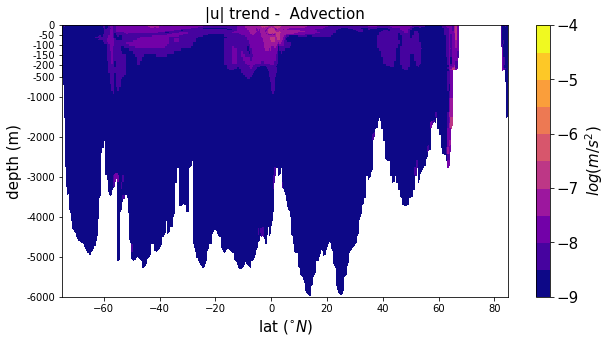

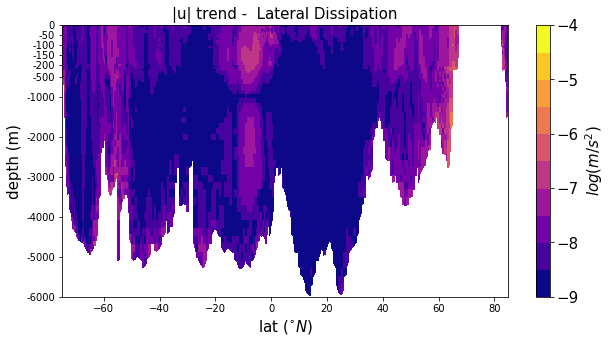

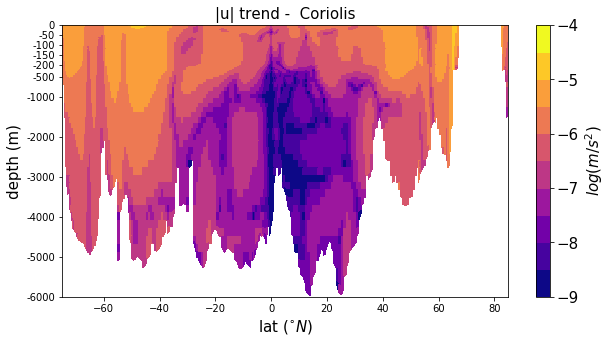

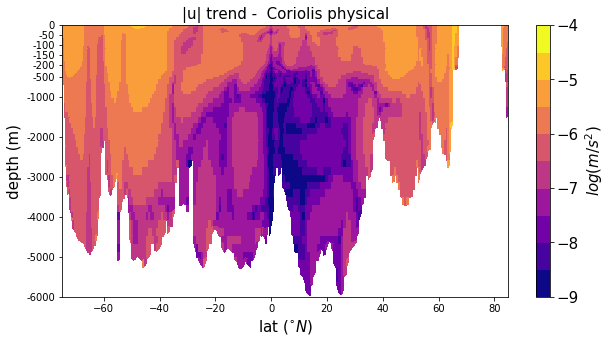

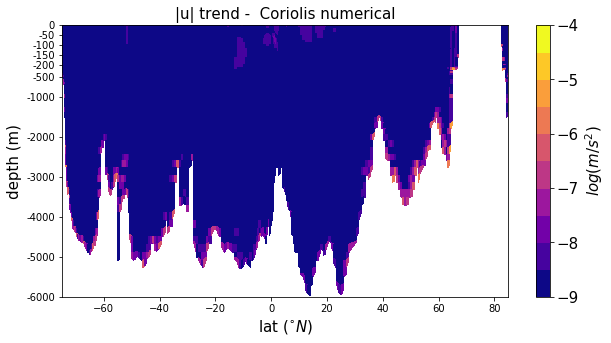

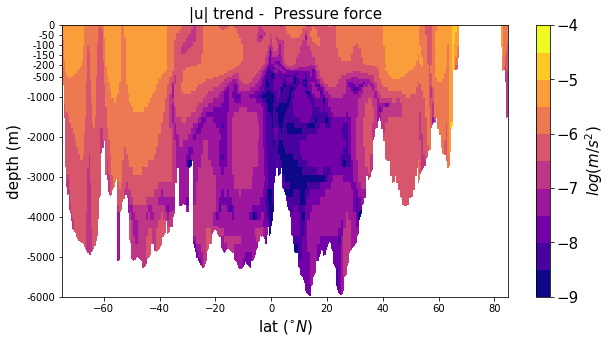

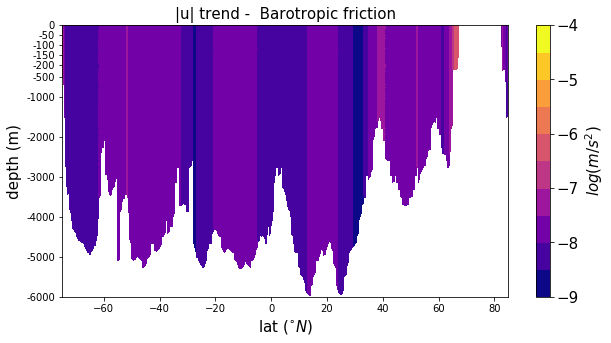

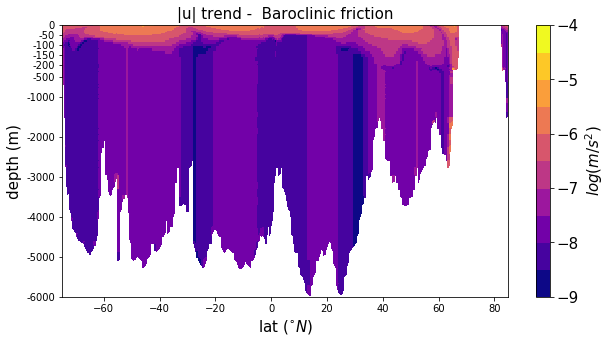

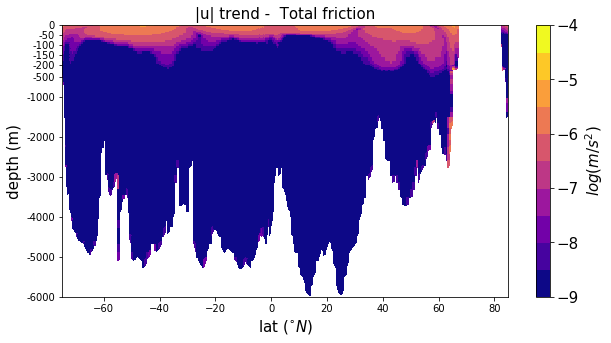

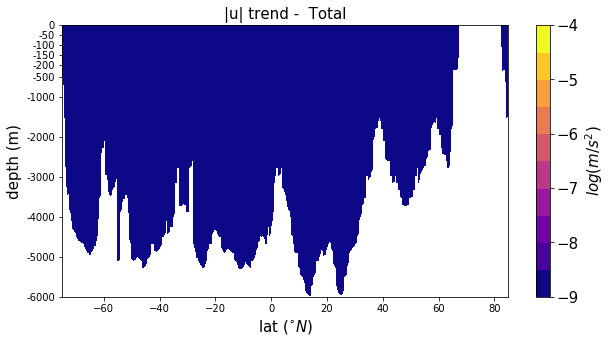

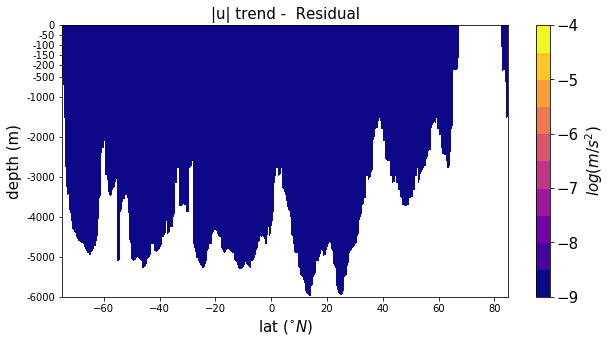

In [5]:
# Figure properties:
levs=np.linspace(-9,-4,11)
ylab='lat ($^{\circ}N$)'
zlab='depth (m)'
title='|u| trend - '
unit='$log(m/s^2)$'
file='U_budget_'
frame=[-75, 85, -6000, -0.5]

# Selection of meridional cross-section over the Atlantic
ind_Atl=search_lon(-35,meshmask.glamt)
y_Atl=y.isel(x=ind_Atl)
z_Atl=-meshmask.gdept_0.isel(x=ind_Atl)
z_Atl_stretch=z_Atl.copy()
z_Atl_stretch.data[z_Atl_stretch.data<-200]=-200+(z_Atl_stretch.data[z_Atl_stretch.data<-200]+200)/5
utrd_Atl=utrd.isel(x=ind_Atl)
utrd2_Atl=utrd2.isel(x=ind_Atl)

# Advection
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdkeg+utrd_Atl.utrdrvo+utrd_Atl.utrdzad,utrd_Atl.vtrdkeg+utrd_Atl.vtrdrvo+utrd_Atl.vtrdzad)),
    levs,unit,ylab,zlab,title+' Advection',colorbar,file+'adv',frame)

# Lateral dissipation
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdldf,utrd_Atl.vtrdldf)),
    levs,unit,ylab,zlab,title+' Lateral Dissipation',colorbar,file+'ldf',frame)

# Coriolis and its decomposition
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdpvo,utrd_Atl.vtrdpvo)),
    levs,unit,ylab,zlab,title+' Coriolis',colorbar,file+'pvo',frame)

cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd2_Atl.utrdpvo_phys,utrd2_Atl.vtrdpvo_phys)),
    levs,unit,ylab,zlab,title+' Coriolis physical',colorbar,file+'pvo_phys',frame)

cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd2_Atl.utrdpvo_num,utrd2_Atl.vtrdpvo_num)),
    levs,unit,ylab,zlab,title+' Coriolis numerical',colorbar,file+'pvo_num',frame)

# Pressure force
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdhpg,utrd_Atl.vtrdhpg)),
    levs,unit,ylab,zlab,title+' Pressure force',colorbar,file+'pg',frame)

# Barotropic trend (wind, bottom stress plus barotropic correction)
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdspg,utrd_Atl.vtrdspg)),
    levs,unit,ylab,zlab,title+' Barotropic friction',colorbar,file+'zdfbt',frame)

# Baroclinic vertical friction
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdzdf,utrd_Atl.vtrdzdf)),
    levs,unit,ylab,zlab,title+' Baroclinic friction',colorbar,file+'zdfbc',frame)

# Total vertical friction
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdspg+utrd_Atl.utrdzdf,utrd_Atl.vtrdspg+utrd_Atl.vtrdzdf)),
    levs,unit,ylab,zlab,title+' Total friction',colorbar,file+'zdf',frame)

# Total trend
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdtot,utrd_Atl.vtrdtot)),
    levs,unit,ylab,zlab,title+' Total',colorbar,file+'tot',frame)

# Residual (Asselin time filter plus error)
cbar=vertical_section(y_Atl,z_Atl,
    log10(norm(utrd_Atl.utrdtot-(utrd_Atl.utrdkeg+utrd_Atl.utrdrvo+utrd_Atl.utrdzad+utrd_Atl.utrdldf+utrd_Atl.utrdpvo+utrd_Atl.utrdhpg+utrd_Atl.utrdspg+utrd_Atl.utrdzdf),
         utrd_Atl.vtrdtot-(utrd_Atl.vtrdkeg+utrd_Atl.vtrdrvo+utrd_Atl.vtrdzad+utrd_Atl.vtrdldf+utrd_Atl.vtrdpvo+utrd_Atl.vtrdhpg+utrd_Atl.vtrdspg+utrd_Atl.vtrdzdf))),
    levs,unit,ylab,zlab,title+' Residual',colorbar,file+'res',frame)

## Depth-dependent vorticity equation

/usr/lib64/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


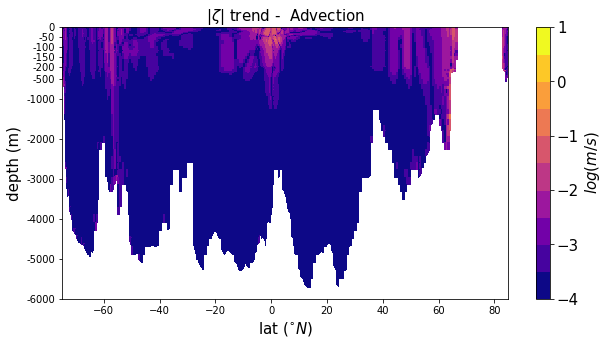

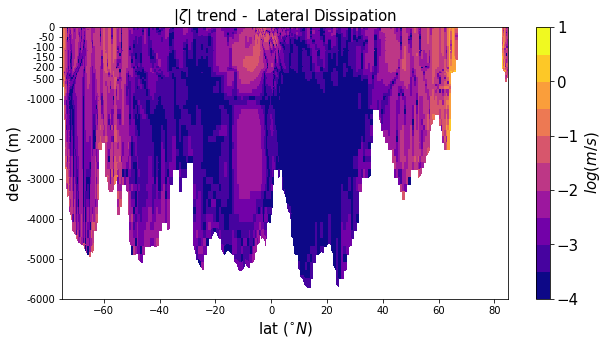

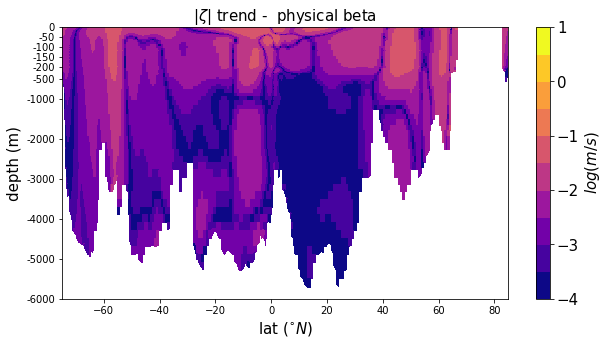

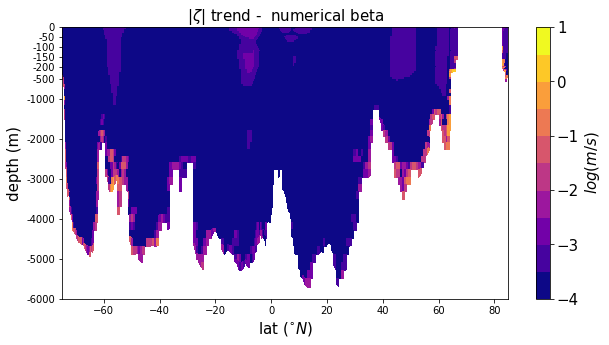

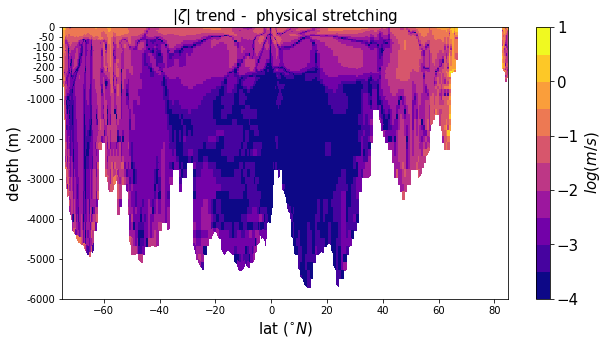

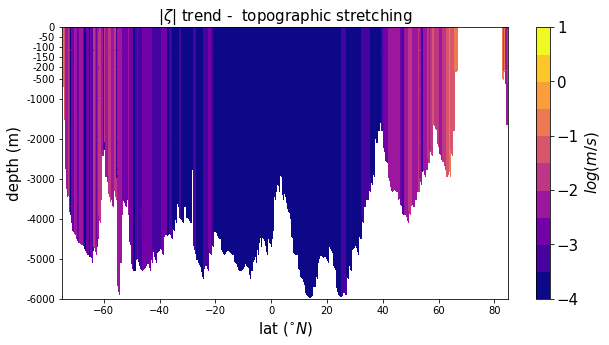

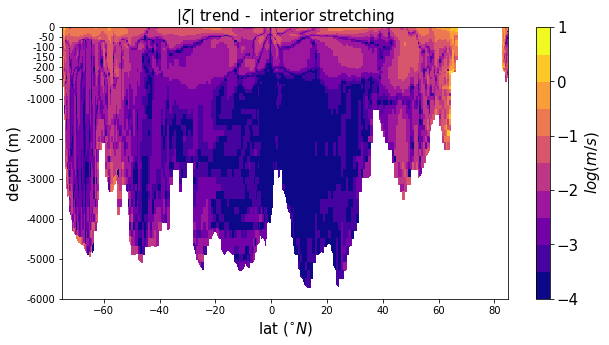

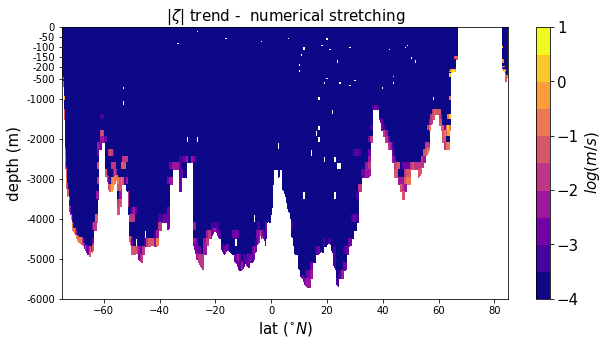

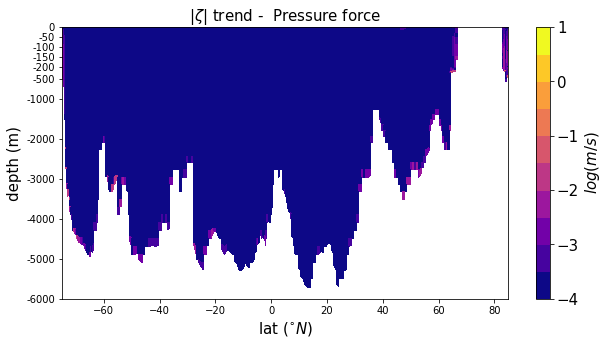

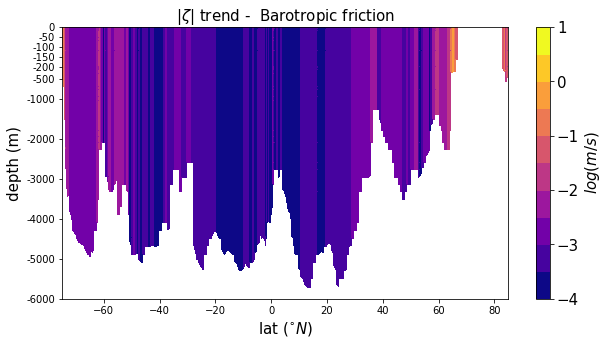

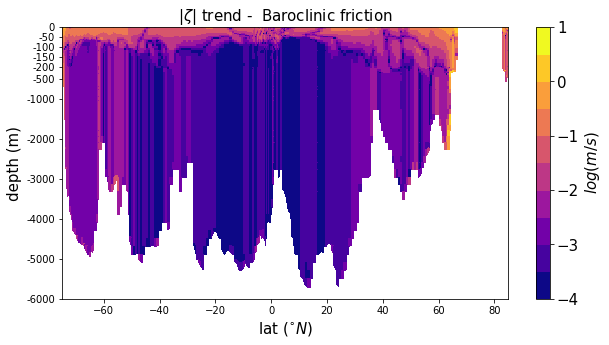

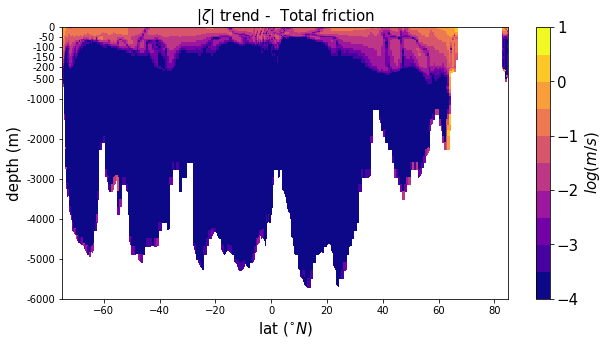

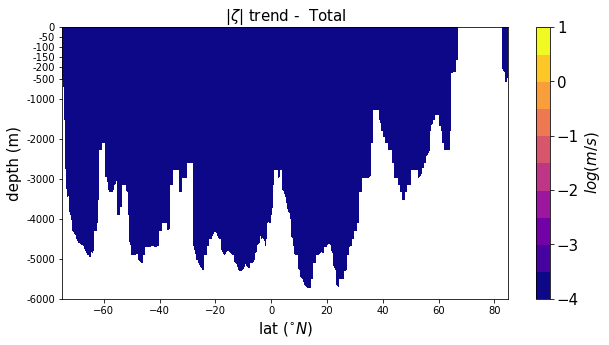

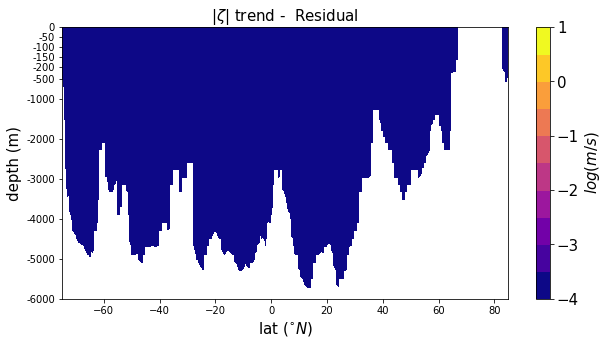

In [6]:
# Figure properties:
levs=np.linspace(-4,1,11)
title='|$\zeta$| trend - '
unit='$log(m/s)$'
file='Z_budget_'
frame=[-75, 85, -6000, -0.5]
b=meshmask.beta

# Selection of meridional cross-section over the Atlantic
ztrd_Atl=ztrd.isel(x=ind_Atl)
ztrd2_Atl=ztrd2.isel(x=ind_Atl)
b_Atl=b.isel(x=ind_Atl)

# Advection
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdkeg+ztrd_Atl.ztrdrvo+ztrd_Atl.ztrdzad)/b_Atl),
    levs,unit,ylab,zlab,title+' Advection',colorbar,file+'adv',frame)

# Lateral dissipation
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdldf)/b_Atl),
    levs,unit,ylab,zlab,title+' Lateral Dissipation',colorbar,file+'ldf',frame)

# Coriolis and its decomposition
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd2_Atl.ztrd_betaphys)/b_Atl),
    levs,unit,ylab,zlab,title+' physical beta',colorbar,file+'beta_phys',frame)

cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd2_Atl.ztrd_betanum)/b_Atl),
    levs,unit,ylab,zlab,title+' numerical beta',colorbar,file+'beta_num',frame)

cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd2_Atl.ztrd_stretchphys)/b_Atl),
    levs,unit,ylab,zlab,title+' physical stretching',colorbar,file+'stretch_phys',frame)

cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd2_Atl.ztrd_topo_stretch)/b_Atl),
    levs,unit,ylab,zlab,title+' topographic stretching',colorbar,file+'stretch_topo',frame)

cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd2_Atl.ztrd_stretchphys-ztrd2_Atl.ztrd_topo_stretch)/b_Atl),
    levs,unit,ylab,zlab,title+' interior stretching',colorbar,file+'stretch_interior',frame)

cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd2_Atl.ztrd_stretchnum)/b_Atl),
    levs,unit,ylab,zlab,title+' numerical stretching',colorbar,file+'stretch_phys',frame)

# Pressure force
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdhpg)/b_Atl),
    levs,unit,ylab,zlab,title+' Pressure force',colorbar,file+'pg',frame)

# Barotropic trend (wind, bottom stress plus barotropic correction)
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdspg)/b_Atl),
    levs,unit,ylab,zlab,title+' Barotropic friction',colorbar,file+'bt',frame)

# Baroclinic vertical friction
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdzdf)/b_Atl),
    levs,unit,ylab,zlab,title+' Baroclinic friction',colorbar,file+'zdfbc',frame)

# Total vertical friction
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdspg+ztrd_Atl.ztrdzdf)/b_Atl),
    levs,unit,ylab,zlab,title+' Total friction',colorbar,file+'zdf',frame)

# Total trend
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdtot)/b_Atl),
    levs,unit,ylab,zlab,title+' Total',colorbar,file+'tot',frame)

# Residual (Asselin time filter plus error)
cbar=vertical_section(y_Atl,z_Atl,
    log10(abs(ztrd_Atl.ztrdtot-(ztrd_Atl.ztrdkeg+ztrd_Atl.ztrdrvo+ztrd_Atl.ztrdzad+ztrd_Atl.ztrdldf+ztrd_Atl.ztrdpvo+ztrd_Atl.ztrdhpg+ztrd_Atl.ztrdspg+ztrd_Atl.ztrdzdf))/b_Atl),
    levs,unit,ylab,zlab,title+' Residual',colorbar,file+'res',frame)

## Depth-integral momentum equation

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f0a980662d0>,
 <matplotlib.colorbar.Colorbar at 0x7f0a9cce56d0>)

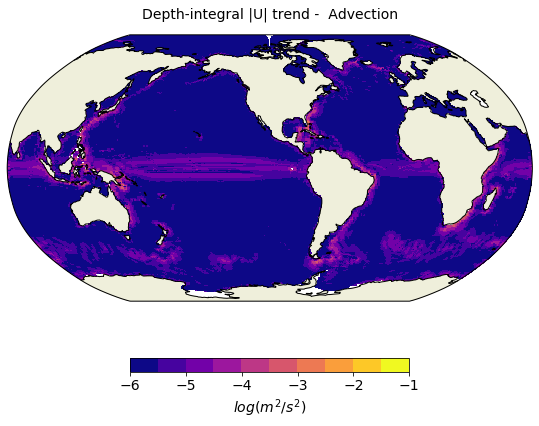

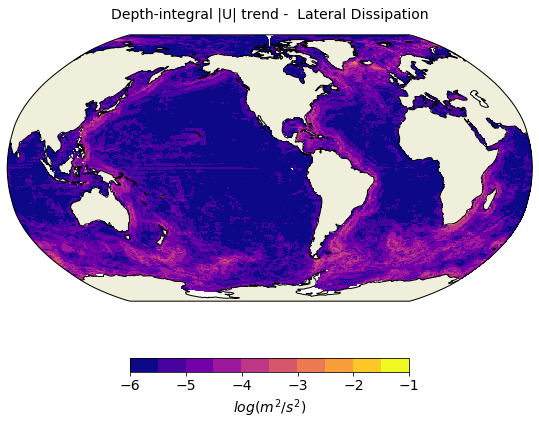

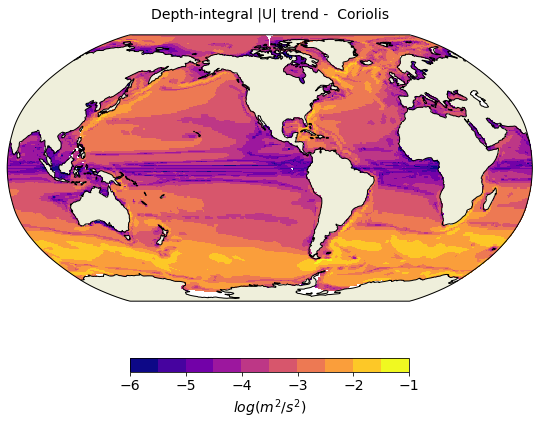

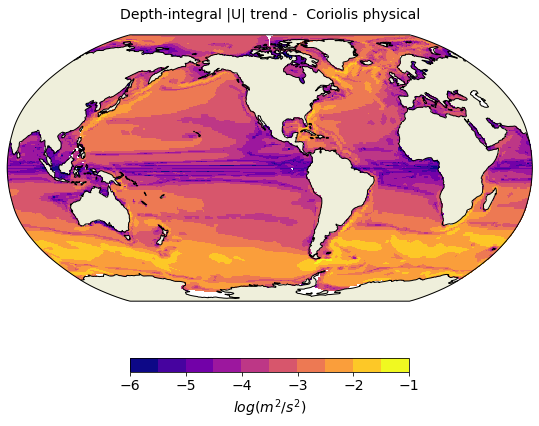

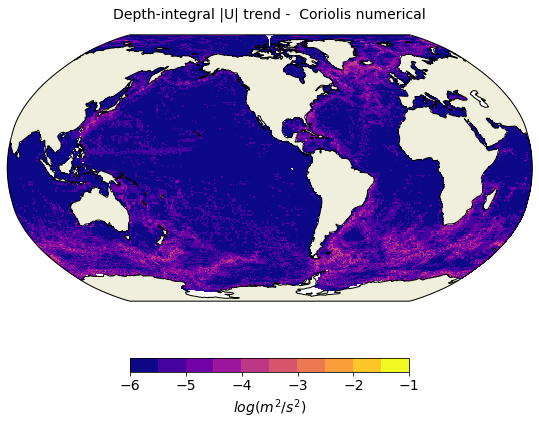

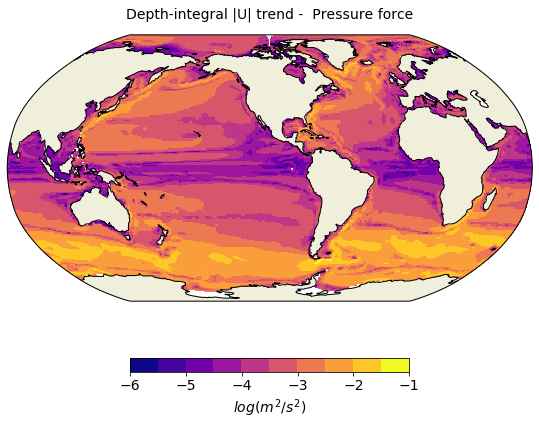

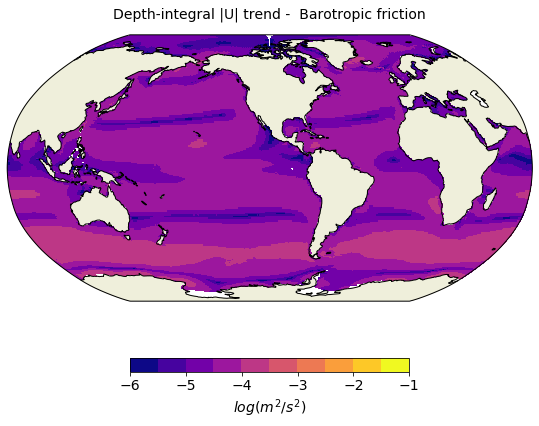

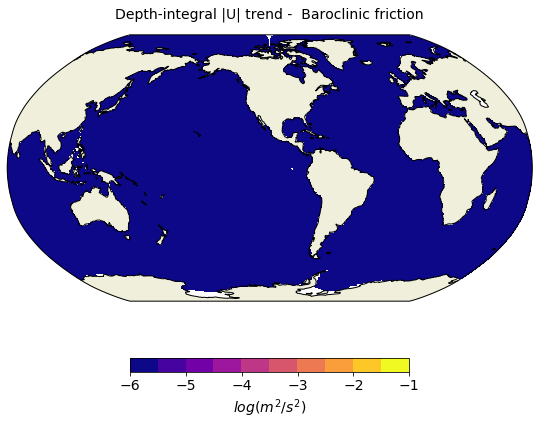

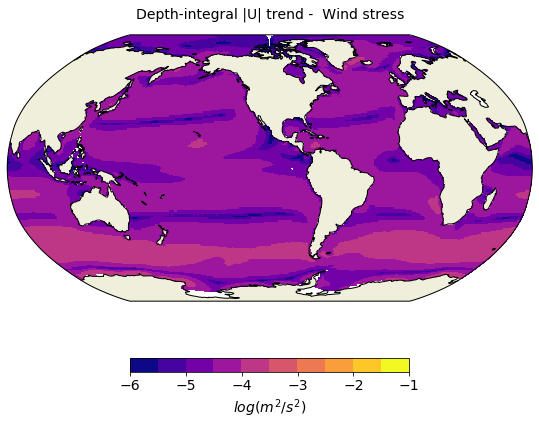

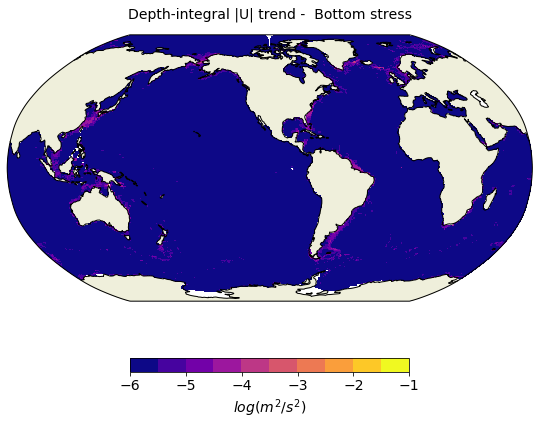

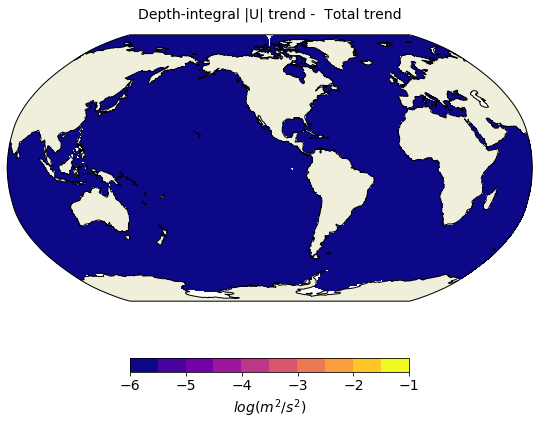

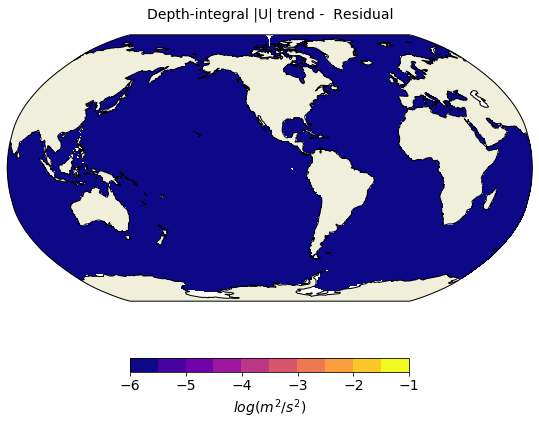

In [6]:
# Figure properties:
levs=np.linspace(-6,-1,11)
unit='$log(m^2/s^2)$'
title='Depth-integral |U| trend - '
file='U_budget_int_'

# Advection
global_map(x,y,log10(norm(utrd_int.utrdkeg+utrd_int.utrdrvo+utrd_int.utrdzad,utrd_int.vtrdkeg+utrd_int.vtrdrvo+utrd_int.vtrdzad)),
           levs,unit,title+' Advection',colorbar,file+'adv',projection)

# Lateral dissipation
global_map(x,y,log10(norm(utrd_int.utrdldf,utrd_int.vtrdldf)),
           levs,unit,title+' Lateral Dissipation',colorbar,file+'ldf',projection)

# Coriolis and its decomposition
global_map(x,y,log10(norm(utrd_int.utrdpvo,utrd_int.vtrdpvo)),
           levs,unit,title+' Coriolis',colorbar,file+'pvo',projection)

global_map(x,y,log10(norm(utrd2_int.utrdpvo_phys,utrd2_int.vtrdpvo_phys)),
           levs,unit,title+' Coriolis physical',colorbar,file+'pvo_phys',projection)

global_map(x,y,log10(norm(utrd2_int.utrdpvo_num,utrd2_int.vtrdpvo_num)),
           levs,unit,title+' Coriolis numerical',colorbar,file+'pvo_num',projection)

# Pressure force
global_map(x,y,log10(norm(utrd_int.utrdhpg,utrd_int.vtrdhpg)),
           levs,unit,title+' Pressure force',colorbar,file+'pg',projection)

# Barotropic trend (wind, bottom stress plus barotropic correction)
global_map(x,y,log10(norm(utrd_int.utrdspg,utrd_int.vtrdspg)),
           levs,unit,title+' Barotropic friction',colorbar,file+'bt',projection)

# Baroclinic vertical friction
global_map(x,y,log10(norm(utrd_int.utrdzdf,utrd_int.vtrdzdf)),
           levs,unit,title+' Baroclinic friction',colorbar,file+'zdf',projection)

# Surface wind stress
global_map(x,y,log10(norm(utrd_int.tauuo/rho0,utrd_int.tauvo/rho0)),
           levs,unit,title+' Wind stress',colorbar,file+'tau',projection)

# Bottom friction
global_map(x,y,log10(norm(utrd_int.utrdspg-utrd_int.tauuo/rho0,utrd_int.vtrdspg-utrd_int.tauvo/rho0)),
           levs,unit,title+' Bottom stress',colorbar,file+'taub',projection)

# Total trend
global_map(x,y,log10(norm(utrd_int.utrdtot,utrd_int.vtrdtot)),
           levs,unit,title+' Total trend',colorbar,file+'tot',projection)

# Residual (Asselin time filter plus error)
global_map(x,y,log10(norm(utrd_int.utrdtot-(utrd_int.utrdkeg+utrd_int.utrdrvo+utrd_int.utrdzad+utrd_int.utrdldf+utrd_int.utrdpvo+utrd_int.utrdhpg+utrd_int.utrdspg+utrd_int.utrdzdf),
                          utrd_int.vtrdtot-(utrd_int.vtrdkeg+utrd_int.vtrdrvo+utrd_int.vtrdzad+utrd_int.vtrdldf+utrd_int.vtrdpvo+utrd_int.vtrdhpg+utrd_int.vtrdspg+utrd_int.vtrdzdf))),
           levs,unit,title+' Residual',colorbar,file+'res',projection)


## Depth-integral vorticity equation

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f34f3b2c2d0>,
 <matplotlib.colorbar.Colorbar at 0x7f34f3b18790>)

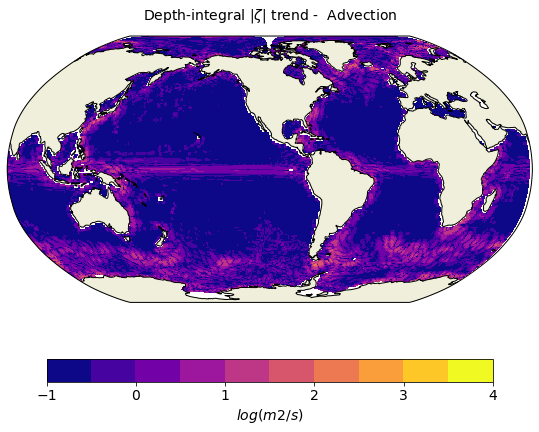

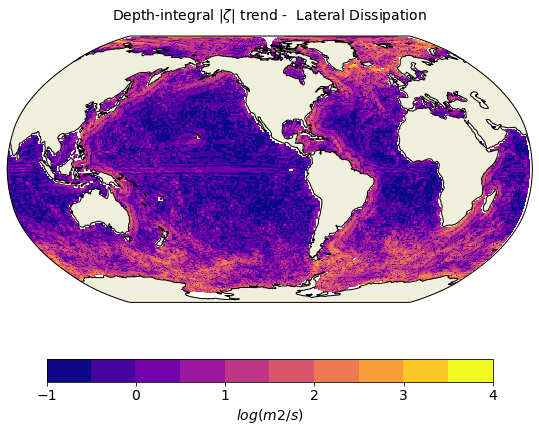

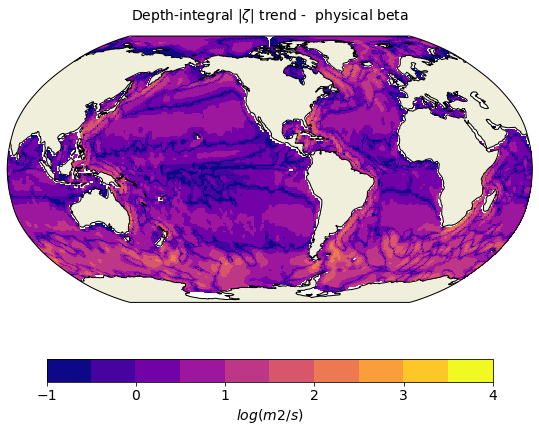

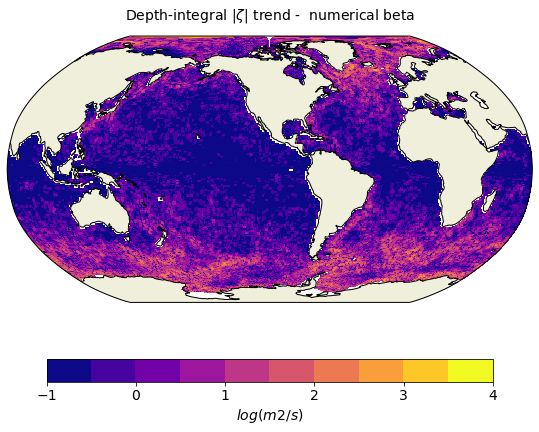

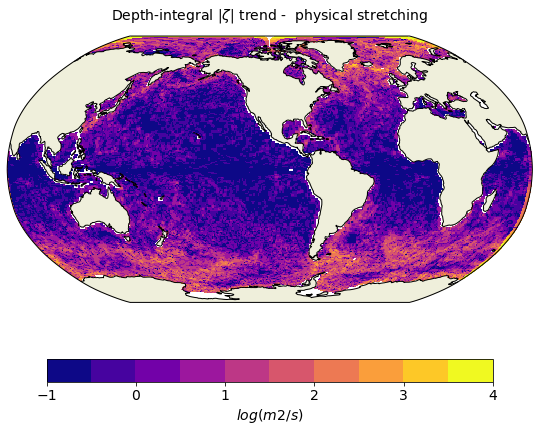

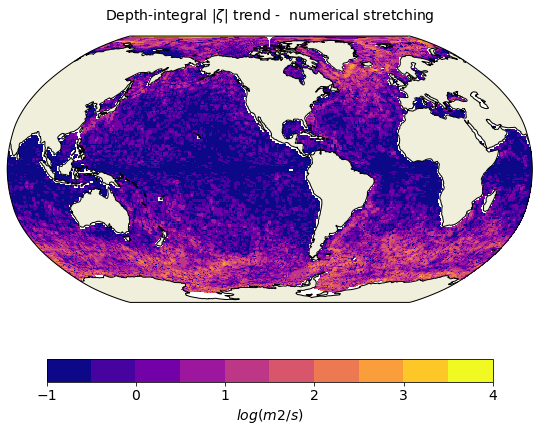

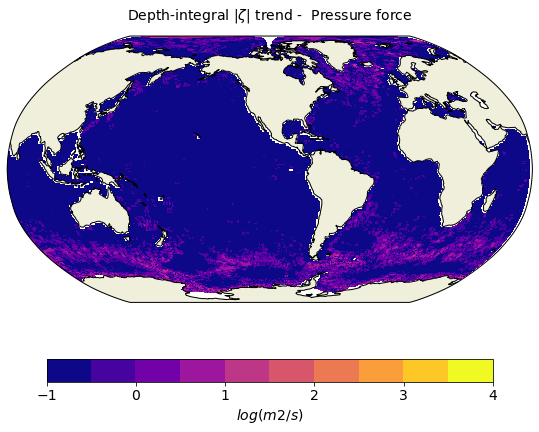

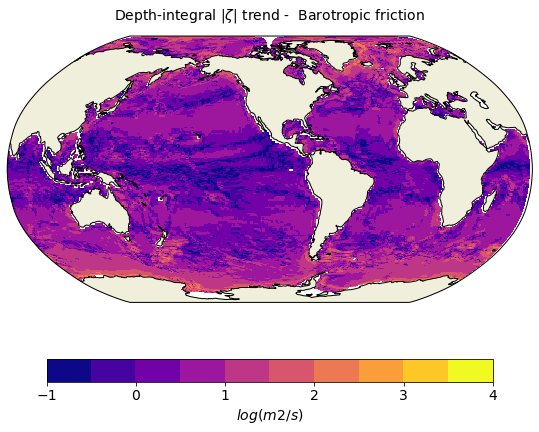

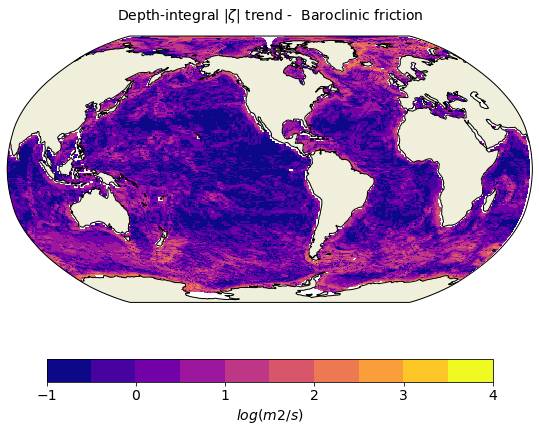

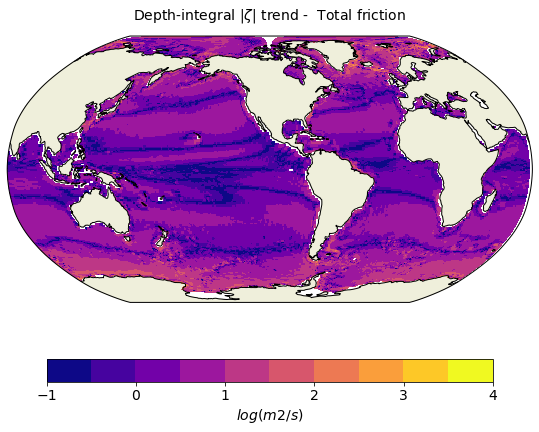

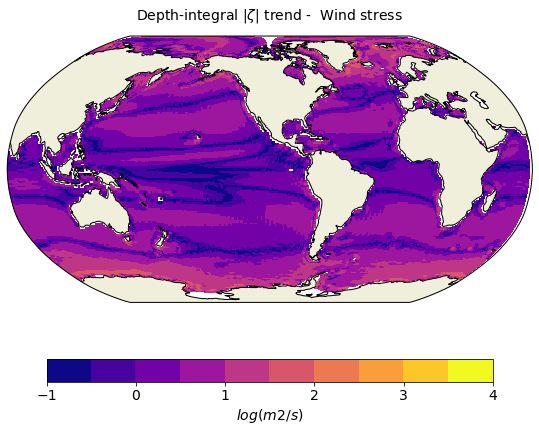

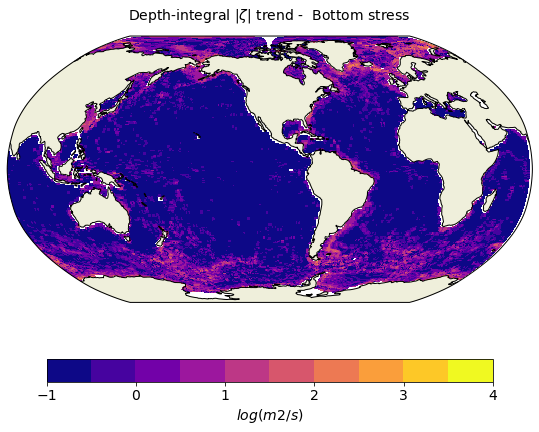

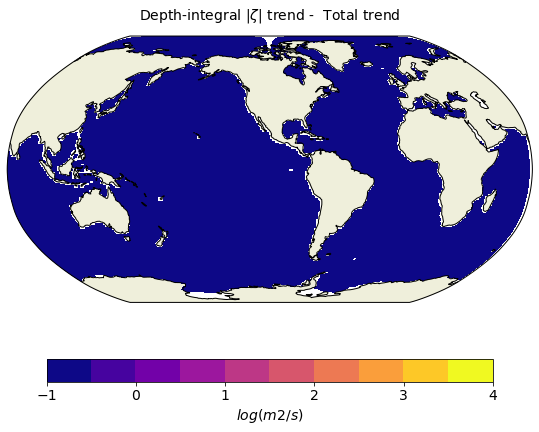

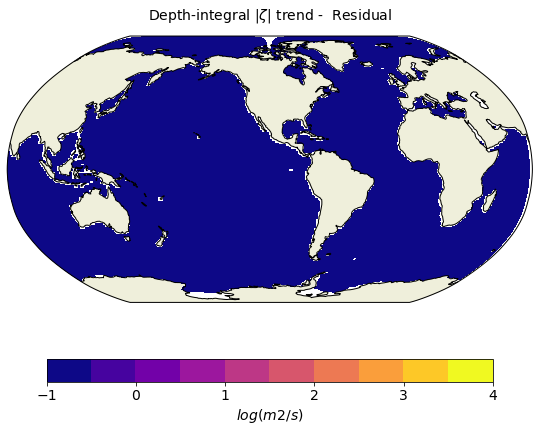

In [7]:
# Figure properties:
levs=np.linspace(-1,4,11)
unit='$log(m2/s)$'
title='Depth-integral |$\zeta$| trend - '
file='Z_budget_int_'

# Advection
global_map(x,y,log10(abs(ztrd_int.ztrdkeg+ztrd_int.ztrdrvo+ztrd_int.ztrdzad)/b),
           levs,unit,title+' Advection',colorbar,file+'adv',projection)

# Lateral dissipation
global_map(x,y,log10(abs(ztrd_int.ztrdldf)/b),
           levs,unit,title+' Lateral Dissipation',colorbar,file+'ldf',projection)

# Coriolis and its decomposition
global_map(x,y,log10(abs(ztrd2_int.ztrd_betaphys)/b),
           levs,unit,title+' physical beta',colorbar,file+'beta_phys',projection)

global_map(x,y,log10(abs(ztrd2_int.ztrd_betanum)/b),
           levs,unit,title+' numerical beta',colorbar,file+'beta_num',projection)

global_map(x,y,log10(abs(ztrd2_int.ztrd_stretchphys)/b),
           levs,unit,title+' physical stretching',colorbar,file+'stretch_phys',projection)

global_map(x,y,log10(abs(ztrd2_int.ztrd_stretchnum)/b),
           levs,unit,title+' numerical stretching',colorbar,file+'stretch_num',projection)

# Pressure force
global_map(x,y,log10(abs(ztrd_int.ztrdhpg)/b),
           levs,unit,title+' Pressure force',colorbar,file+'pg',projection)

# Barotropic trend (wind, bottom stress plus barotropic correction)
global_map(x,y,log10(abs(ztrd_int.ztrdspg)/b),
           levs,unit,title+' Barotropic friction',colorbar,file+'bt',projection)

# Baroclinic vertical friction
global_map(x,y,log10(abs(ztrd_int.ztrdzdf)/b),
           levs,unit,title+' Baroclinic friction',colorbar,file+'zdfbc',projection)

# Total vertical friction
global_map(x,y,log10(abs(ztrd_int.ztrdspg+ztrd_int.ztrdzdf)/b),
           levs,unit,title+' Total friction',colorbar,file+'zdf',projection)

# Surface wind stress
global_map(x,y,log10(abs(ztrd_int.ztrdtau/rho0)/b),
           levs,unit,title+' Wind stress',colorbar,file+'tau',projection)

# Bottom friction
global_map(x,y,log10(abs(ztrd_int.ztrdspg+ztrd_int.ztrdzdf-ztrd_int.ztrdtau/rho0)/b),
           levs,unit,title+' Bottom stress',colorbar,file+'taub',projection)

# Total trend
global_map(x,y,log10(abs(ztrd_int.ztrdtot)/b),
           levs,unit,title+' Total trend',colorbar,file+'tot',projection)

# Residual (Asselin time filter plus error)
global_map(x,y,log10(abs(ztrd_int.ztrdtot-(ztrd_int.ztrdkeg+ztrd_int.ztrdrvo+ztrd_int.ztrdzad+ztrd_int.ztrdldf+ztrd_int.ztrdpvo+ztrd_int.ztrdhpg+ztrd_int.ztrdspg+ztrd_int.ztrdzdf))/b),
           levs,unit,title+' Residual',colorbar,file+'res',projection)

## Barotropic vorticity equation = vorticity of the depth-integral momentum equation

/usr/lib64/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f34f0ec95d0>,
 <matplotlib.colorbar.Colorbar at 0x7f34f5bd6410>)

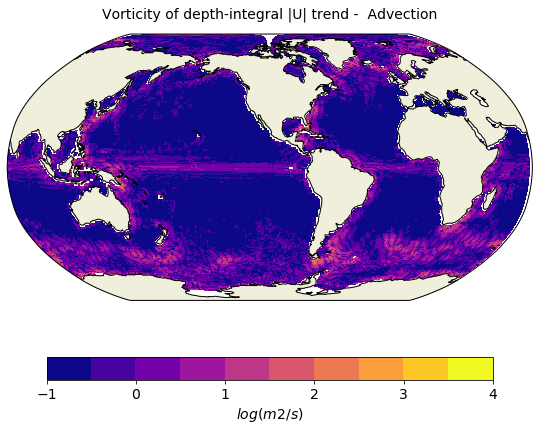

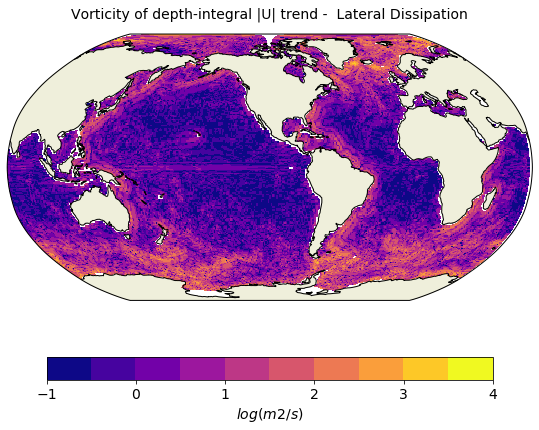

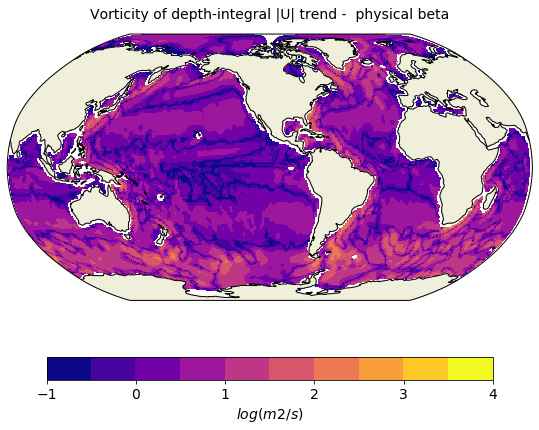

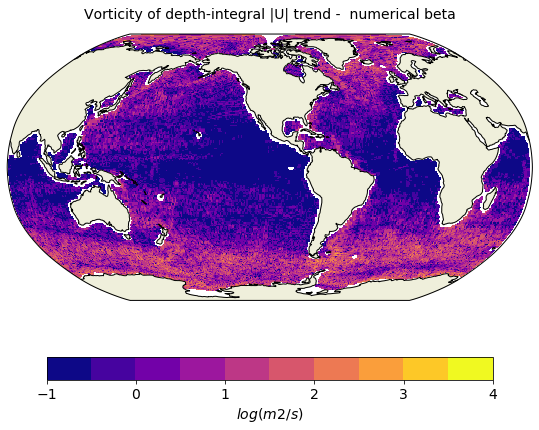

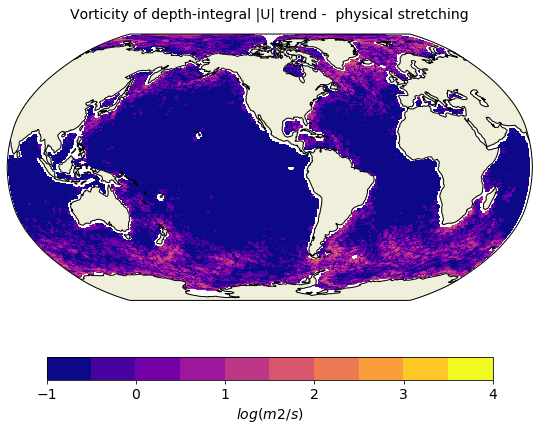

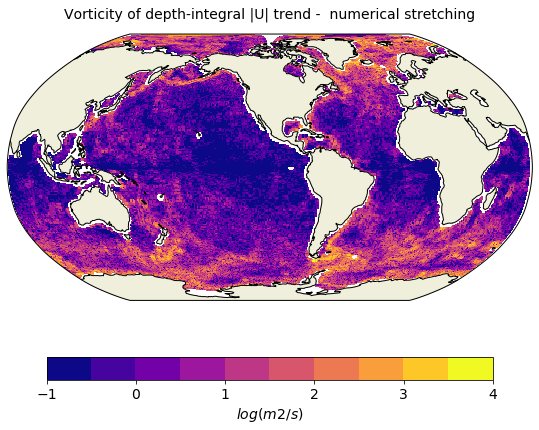

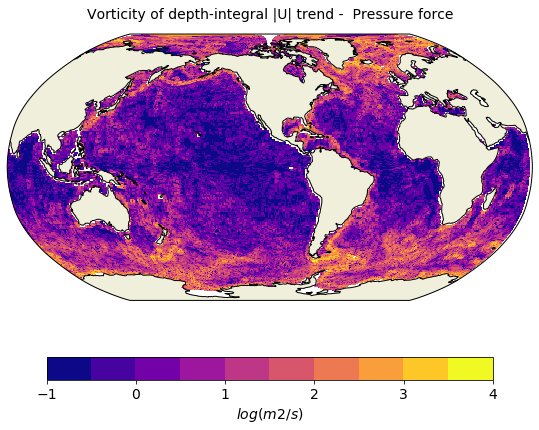

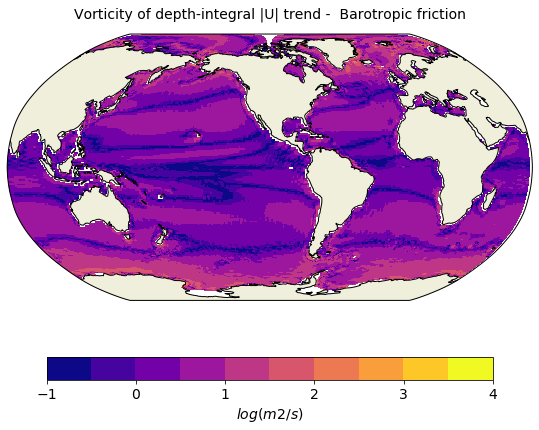

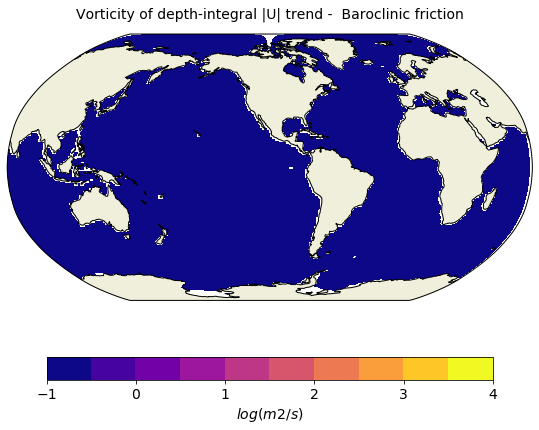

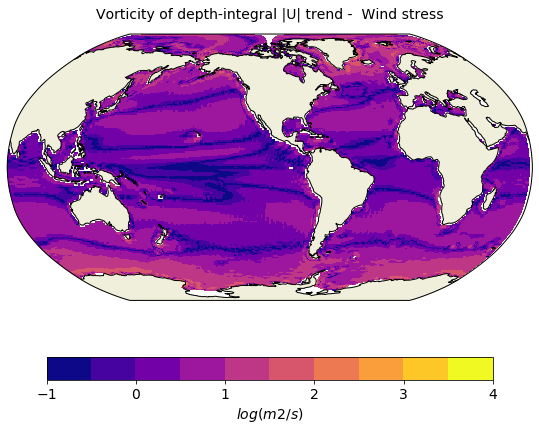

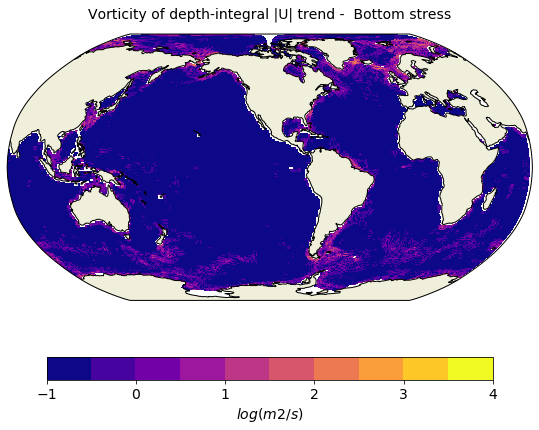

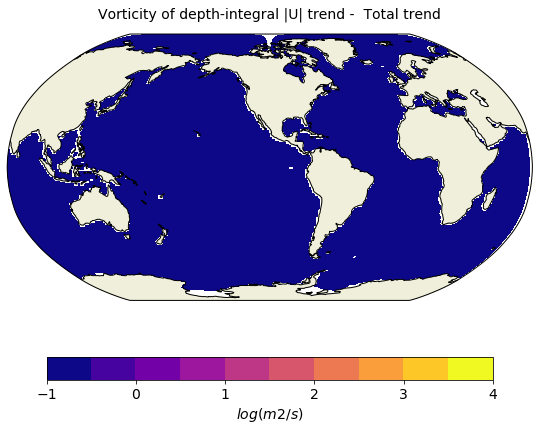

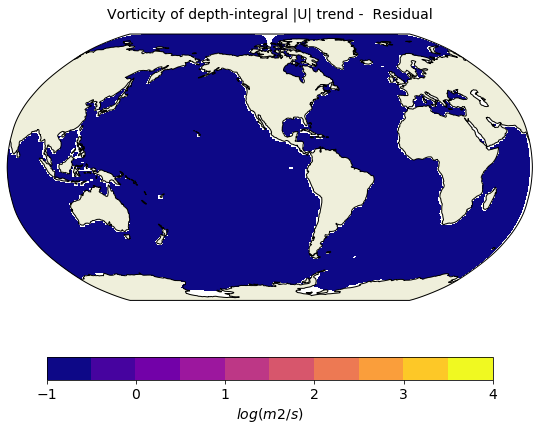

In [8]:
# Figure properties:
title='Vorticity of depth-integral |U| trend - '
file='curl_U_budget_int_'

# Advection
global_map(x,y,log10(abs(curl_utrd_int.ztrdkeg+curl_utrd_int.ztrdrvo+curl_utrd_int.ztrdzad)/b),
           levs,unit,title+' Advection',colorbar,file+'adv',projection)

# Lateral dissipation
global_map(x,y,log10(abs(curl_utrd_int.ztrdldf)/b),
           levs,unit,title+' Lateral Dissipation',colorbar,file+'ldf',projection)

# Coriolis and its decomposition
global_map(x,y,log10(abs(curl_utrd2_int.ztrd_betaphys)/b),
           levs,unit,title+' physical beta',colorbar,file+'beta_phys',projection)

global_map(x,y,log10(abs(curl_utrd2_int.ztrd_betanum)/b),
           levs,unit,title+' numerical beta',colorbar,file+'beta_num',projection)

global_map(x,y,log10(abs(curl_utrd2_int.ztrd_stretchphys)/b),
           levs,unit,title+' physical stretching',colorbar,file+'stretch_phys',projection)

global_map(x,y,log10(abs(curl_utrd2_int.ztrd_stretchnum)/b),
           levs,unit,title+' numerical stretching',colorbar,file+'stretch_num',projection)

# Pressure force
global_map(x,y,log10(abs(curl_utrd_int.ztrdhpg)/b),
           levs,unit,title+' Pressure force',colorbar,file+'pg',projection)

# Barotropic trend (wind, bottom stress plus barotropic correction)
global_map(x,y,log10(abs(curl_utrd_int.ztrdspg)/b),
           levs,unit,title+' Barotropic friction',colorbar,file+'pg',projection)

# Baroclinic vertical friction
global_map(x,y,log10(abs(curl_utrd_int.ztrdzdf)/b),
           levs,unit,title+' Baroclinic friction',colorbar,file+'zdf',projection)

# Surface wind stress
global_map(x,y,log10(abs(curl_utrd_int.ztrdtau/rho0)/b),
           levs,unit,title+' Wind stress',colorbar,file+'tau',projection)

# Bottom friction
global_map(x,y,log10(abs(curl_utrd_int.ztrdspg-curl_utrd_int.ztrdtau/rho0)/b),
           levs,unit,title+' Bottom stress',colorbar,file+'taub',projection)

# Total trend
global_map(x,y,log10(abs(curl_utrd_int.ztrdtot)/b),
           levs,unit,title+' Total trend',colorbar,file+'tot',projection)

# Residual (Asselin time filter plus error)
global_map(x,y,log10(abs(curl_utrd_int.ztrdtot-(curl_utrd_int.ztrdkeg+curl_utrd_int.ztrdrvo+curl_utrd_int.ztrdzad+curl_utrd_int.ztrdldf+curl_utrd_int.ztrdpvo+curl_utrd_int.ztrdhpg+curl_utrd_int.ztrdspg+curl_utrd_int.ztrdzdf))/b),
           levs,unit,title+' Residual',colorbar,file+'res',projection)

## Vorticity of the depth-average momentum equation

/usr/lib64/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f34ee9f1910>,
 <matplotlib.colorbar.Colorbar at 0x7f34eea04290>)

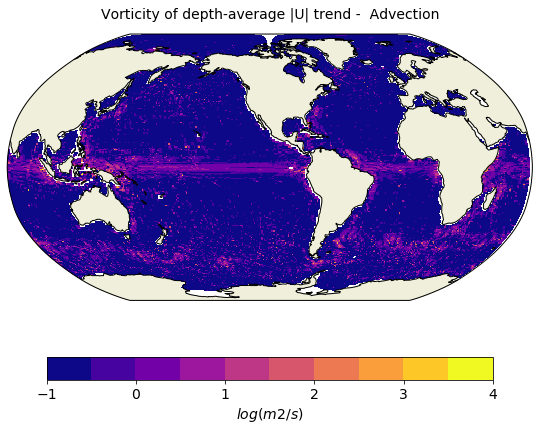

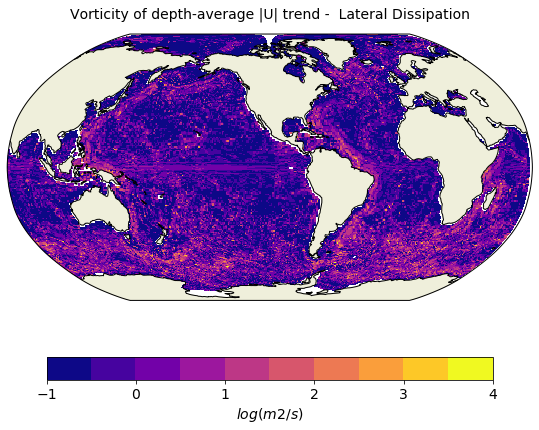

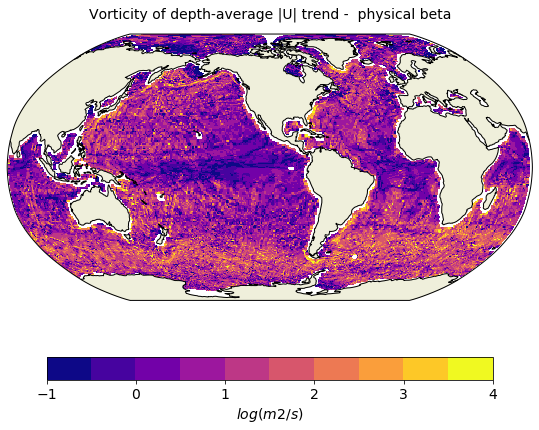

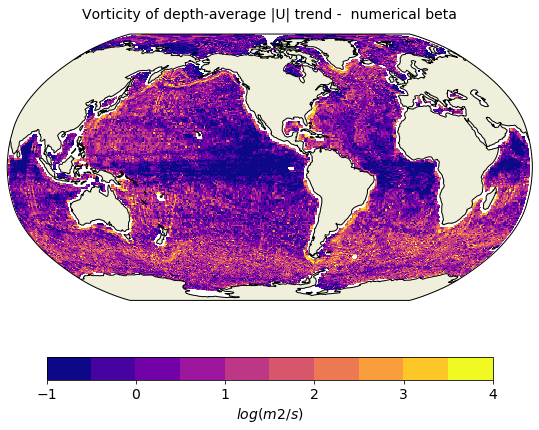

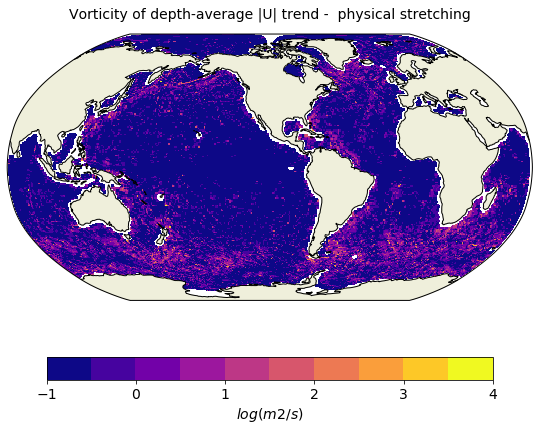

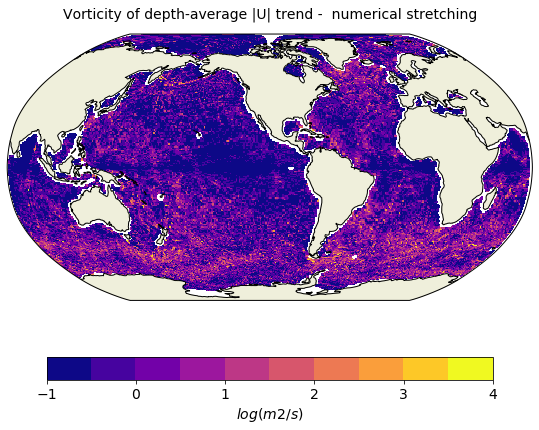

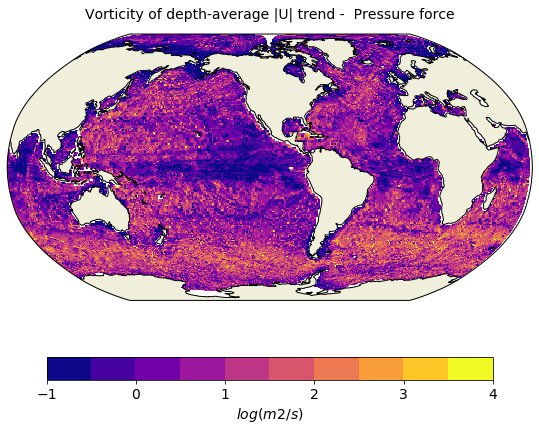

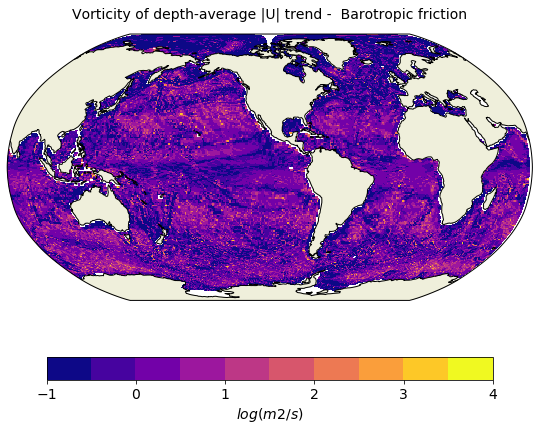

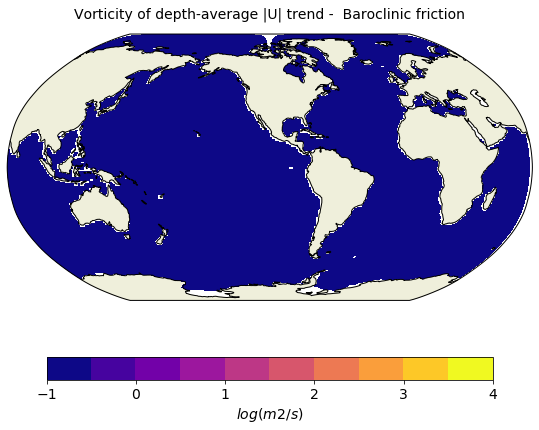

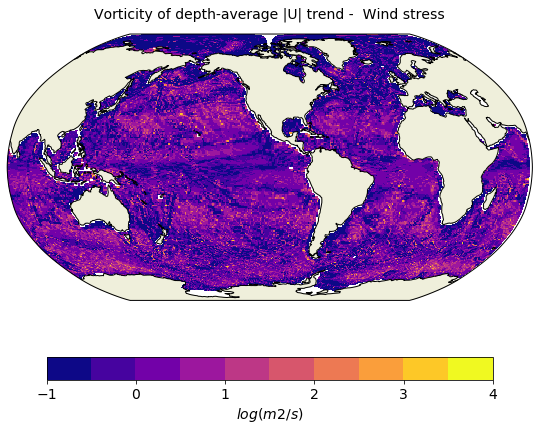

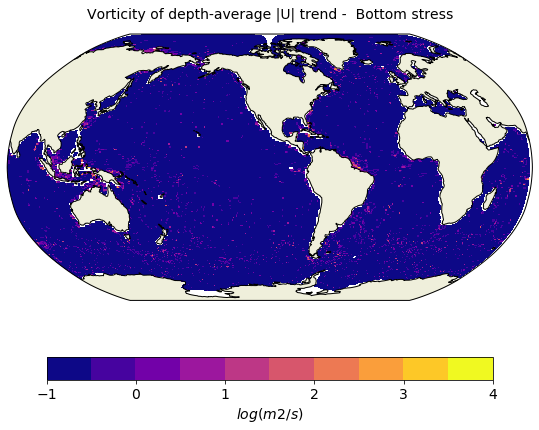

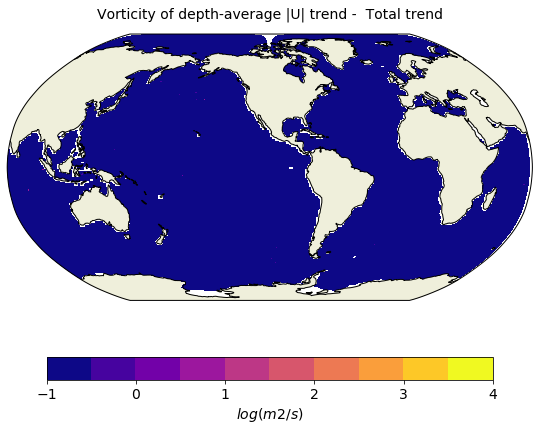

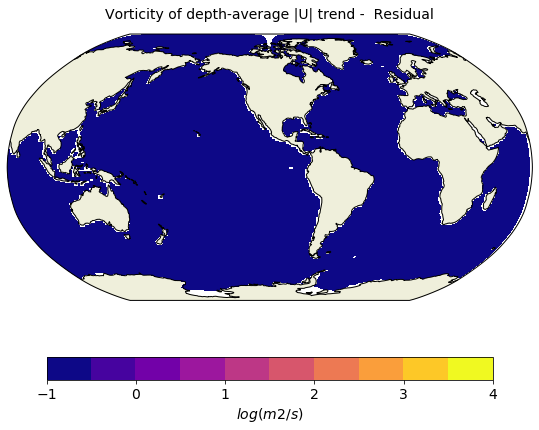

In [9]:
# Figure properties:
title='Vorticity of depth-average |U| trend - '
file='curl_U_budget_av_'
fh=meshmask.div_fh

# Advection
global_map(x,y,log10(abs(curl_utrd_av.ztrdkeg+curl_utrd_av.ztrdrvo+curl_utrd_av.ztrdzad)/fh),
           levs,unit,title+' Advection',colorbar,file+'adv',projection)

# Lateral dissipation
global_map(x,y,log10(abs(curl_utrd_av.ztrdldf)/fh),
           levs,unit,title+' Lateral Dissipation',colorbar,file+'ldf',projection)

# Coriolis and its decomposition
global_map(x,y,log10(abs(curl_utrd2_av.ztrd_betaphys)/fh),
           levs,unit,title+' physical beta',colorbar,file+'beta_phys',projection)

global_map(x,y,log10(abs(curl_utrd2_av.ztrd_betanum)/fh),
           levs,unit,title+' numerical beta',colorbar,file+'beta_num',projection)

global_map(x,y,log10(abs(curl_utrd2_av.ztrd_stretchphys)/fh),
           levs,unit,title+' physical stretching',colorbar,file+'stretch_phys',projection)

global_map(x,y,log10(abs(curl_utrd2_av.ztrd_stretchnum)/fh),
           levs,unit,title+' numerical stretching',colorbar,file+'stretch_num',projection)

# Pressure force
global_map(x,y,log10(abs(curl_utrd_av.ztrdhpg)/fh),
           levs,unit,title+' Pressure force',colorbar,file+'pg',projection)

# Barotropic trend (wind, bottom stress plus barotropic correction)
global_map(x,y,log10(abs(curl_utrd_av.ztrdspg)/fh),
           levs,unit,title+' Barotropic friction',colorbar,file+'pg',projection)

# Baroclinic vertical friction
global_map(x,y,log10(abs(curl_utrd_av.ztrdzdf)/fh),
           levs,unit,title+' Baroclinic friction',colorbar,file+'zdf',projection)

# Surface wind stress
global_map(x,y,log10(abs(curl_utrd_av.ztrdtau/rho0)/fh),
           levs,unit,title+' Wind stress',colorbar,file+'tau',projection)

# Bottom friction
global_map(x,y,log10(abs(curl_utrd_av.ztrdspg-curl_utrd_av.ztrdtau/rho0)/fh),
           levs,unit,title+' Bottom stress',colorbar,file+'taub',projection)

# Total trend
global_map(x,y,log10(abs(curl_utrd_av.ztrdtot)/fh),
           levs,unit,title+' Total trend',colorbar,file+'tot',projection)

# Residual (Asselin time filter plus error)
global_map(x,y,log10(abs(curl_utrd_av.ztrdtot-(curl_utrd_av.ztrdkeg+curl_utrd_av.ztrdrvo+curl_utrd_av.ztrdzad+curl_utrd_av.ztrdldf+curl_utrd_av.ztrdpvo+curl_utrd_av.ztrdhpg+curl_utrd_av.ztrdspg+curl_utrd_av.ztrdzdf))/fh),
           levs,unit,title+' Residual',colorbar,file+'res',projection)

## Vorticity of the transport momentum equation = depth-integral momentum equation over f

/usr/lib64/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f1a502d7f10>,
 <matplotlib.colorbar.Colorbar at 0x7f1a50784d90>)

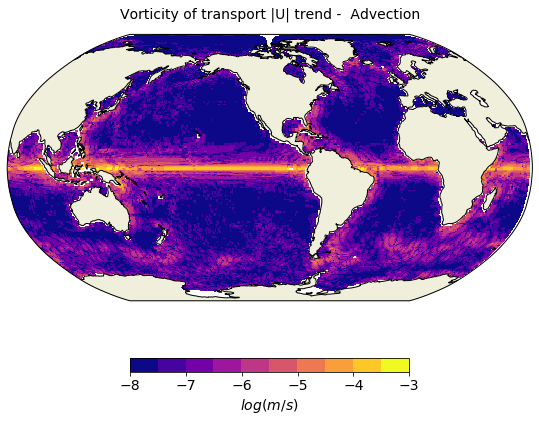

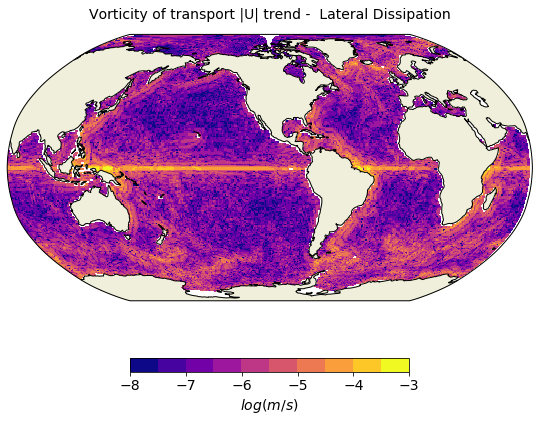

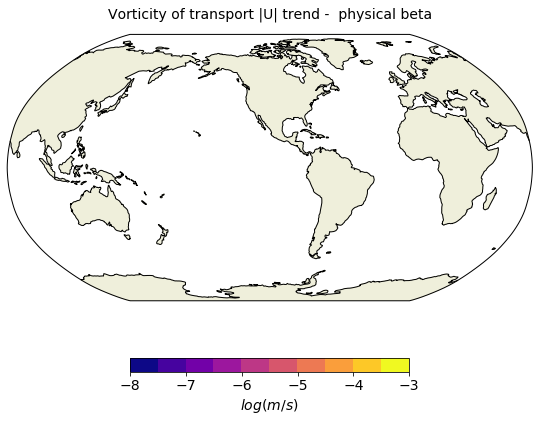

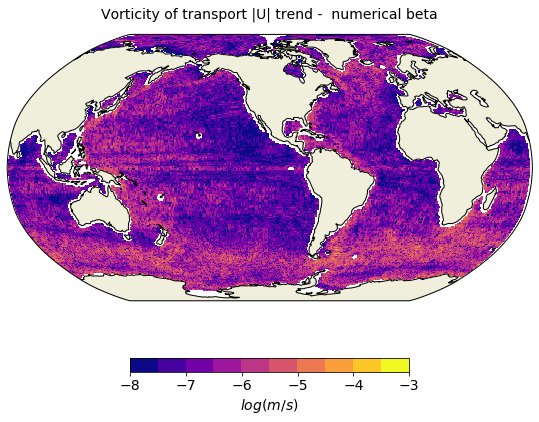

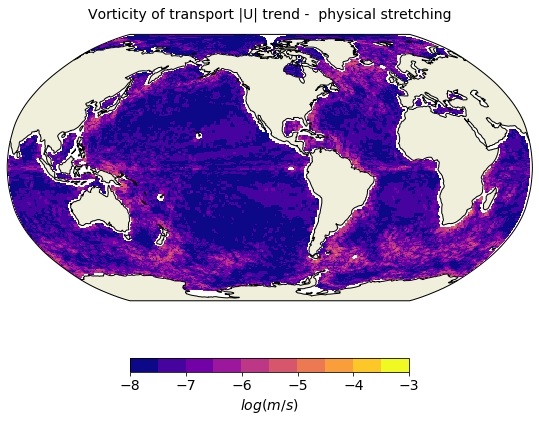

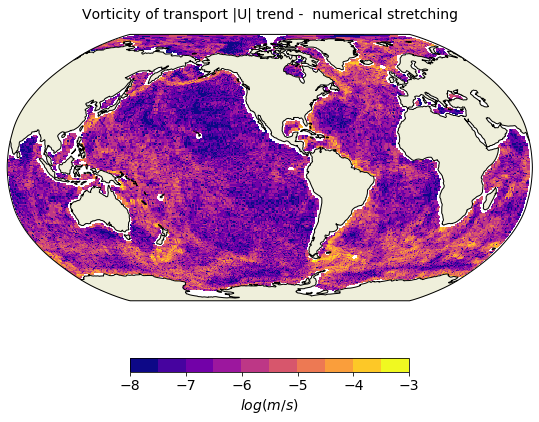

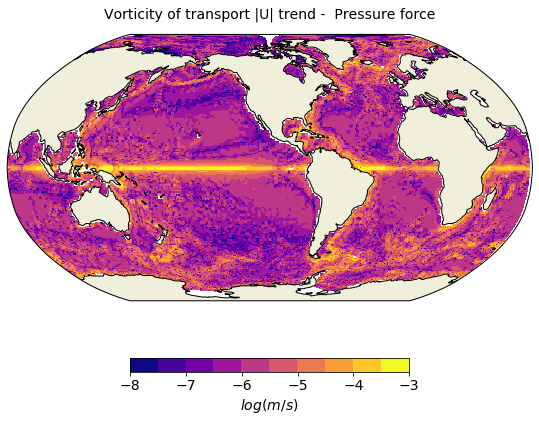

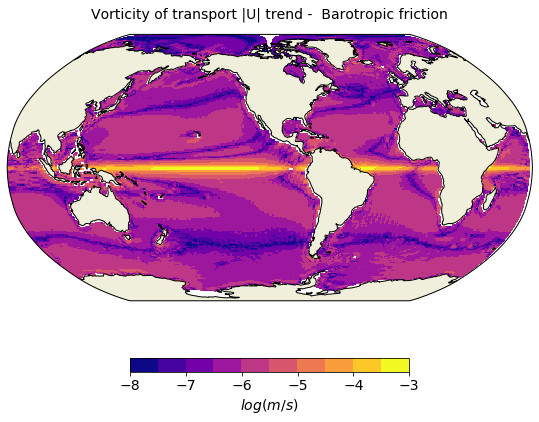

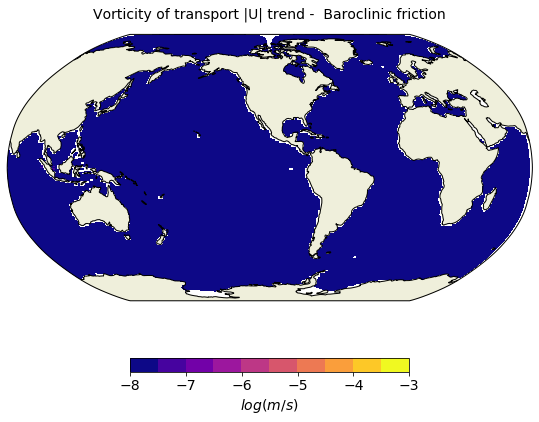

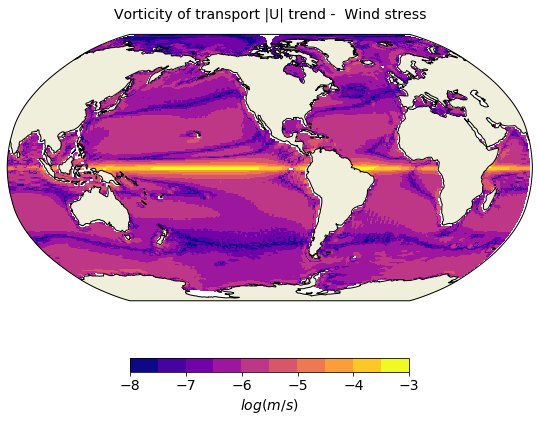

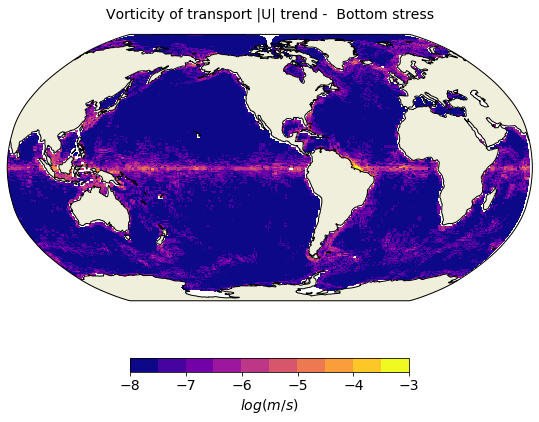

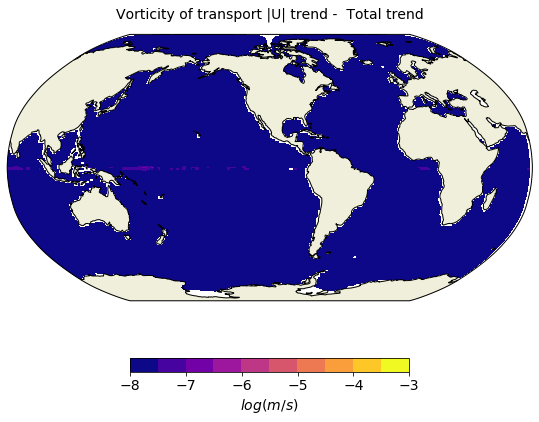

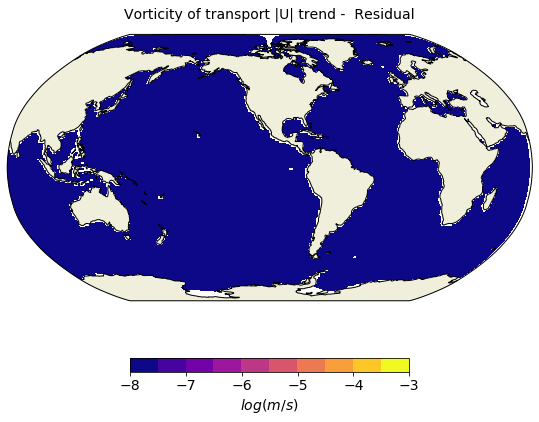

In [11]:
# Figure properties:
levs=np.linspace(-8,-3,11)
unit='$log(m/s)$'
title='Vorticity of transport |U| trend - '
file='curl_U_budget_transp_'

# Advection
global_map(x,y,log10(abs(curl_utrd_transp.ztrdkeg+curl_utrd_transp.ztrdrvo+curl_utrd_transp.ztrdzad)),
           levs,unit,title+' Advection',colorbar,file+'adv',projection)

# Lateral dissipation
global_map(x,y,log10(abs(curl_utrd_transp.ztrdldf)),
           levs,unit,title+' Lateral Dissipation',colorbar,file+'ldf',projection)

# Coriolis and its decomposition
global_map(x,y,log10(abs(curl_utrd2_transp.ztrd_betaphys)),
           levs,unit,title+' physical beta',colorbar,file+'beta_phys',projection)

global_map(x,y,log10(abs(curl_utrd2_transp.ztrd_betanum)),
           levs,unit,title+' numerical beta',colorbar,file+'beta_num',projection)

global_map(x,y,log10(abs(curl_utrd2_transp.ztrd_stretchphys)),
           levs,unit,title+' physical stretching',colorbar,file+'stretch_phys',projection)

global_map(x,y,log10(abs(curl_utrd2_transp.ztrd_stretchnum)),
           levs,unit,title+' numerical stretching',colorbar,file+'stretch_num',projection)

# Pressure force
global_map(x,y,log10(abs(curl_utrd_transp.ztrdhpg)),
           levs,unit,title+' Pressure force',colorbar,file+'pg',projection)

# Barotropic trend (wind, bottom stress plus barotropic correction)
global_map(x,y,log10(abs(curl_utrd_transp.ztrdspg)),
           levs,unit,title+' Barotropic friction',colorbar,file+'pg',projection)

# Baroclinic vertical friction
global_map(x,y,log10(abs(curl_utrd_transp.ztrdzdf)),
           levs,unit,title+' Baroclinic friction',colorbar,file+'zdf',projection)

# Surface wind stress
global_map(x,y,log10(abs(curl_utrd_transp.ztrdtau/rho0)),
           levs,unit,title+' Wind stress',colorbar,file+'tau',projection)

# Bottom friction
global_map(x,y,log10(abs(curl_utrd_transp.ztrdspg-curl_utrd_transp.ztrdtau/rho0)),
           levs,unit,title+' Bottom stress',colorbar,file+'taub',projection)

# Total trend
global_map(x,y,log10(abs(curl_utrd_transp.ztrdtot)),
           levs,unit,title+' Total trend',colorbar,file+'tot',projection)

# Residual (Asselin time filter plus error)
global_map(x,y,log10(abs(curl_utrd_transp.ztrdtot-(curl_utrd_transp.ztrdkeg+curl_utrd_transp.ztrdrvo+curl_utrd_transp.ztrdzad+curl_utrd_transp.ztrdldf+curl_utrd_transp.ztrdpvo+curl_utrd_transp.ztrdhpg+curl_utrd_transp.ztrdspg+curl_utrd_transp.ztrdzdf))),
           levs,unit,title+' Residual',colorbar,file+'res',projection)

# 3. Main dynamical balances

In [26]:
# Common figure properties:
levs6=np.linspace(-0.5,5.5,7)
levs5=np.linspace(-0.5,4.5,6)
unit=''

## Depth-dependent momentum balance

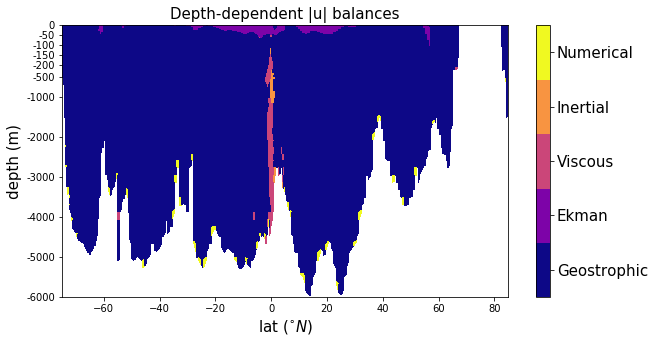

In [18]:
title='Depth-dependent |u| balances'
file='U_balances'

cbar=vertical_section(y_Atl,z_Atl,
    balances.utrd_balances.isel(x=ind_Atl)*meshmask.tmask_nan.isel(x=ind_Atl),
    levs5,unit,ylab,zlab,title,colorbar,file,frame)
cbar.set_ticks(range(0,5))
cbar.set_ticklabels(["Geostrophic","Ekman","Viscous","Inertial","Numerical"])
plt.savefig(file+'.png')

## Depth-integral momentum balance

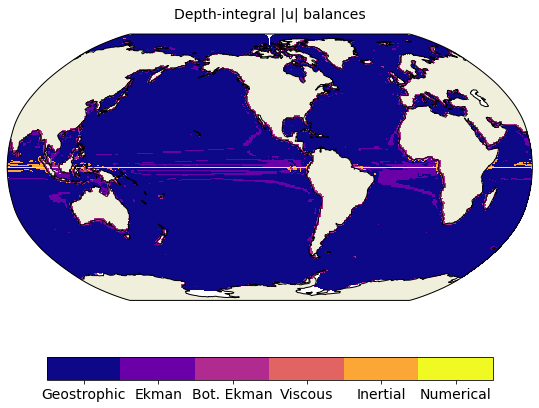

In [19]:
# Figure properties:
title='Depth-integral |u| balances'
file='U_int_balances'

# Depth-integral momentum balances
ax,cbar=global_map(x,y,balances.utrd_int_balances*meshmask.tmask_nan.isel(lev=0),levs6,unit,title,colorbar,file,projection)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Geostrophic","Ekman","Bot. Ekman","Viscous","Inertial","Numerical"])
plt.savefig(file+'.png')

## Depth-dependent vorticity balance

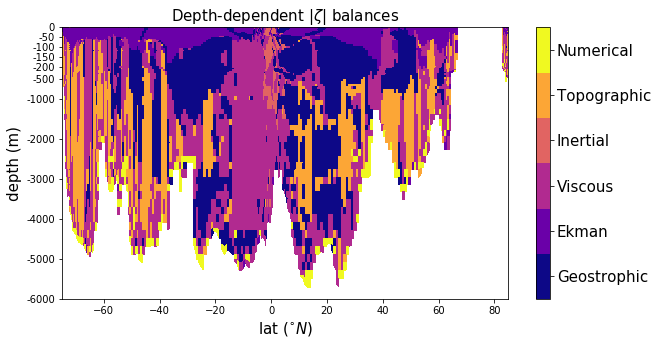

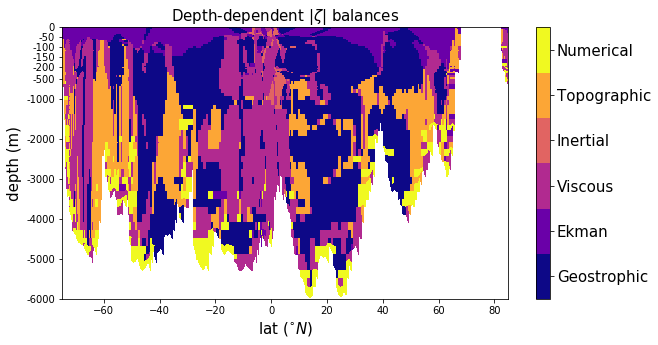

In [33]:
title='Depth-dependent |$\zeta$| balances'
file='Z_balances'

cbar=vertical_section(y_Atl,z_Atl,
    balances.ztrd_balances.isel(x=ind_Atl)*meshmask.tmask_nan.isel(x=ind_Atl),
    levs6,unit,ylab,zlab,title,colorbar,file,frame)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Geostrophic","Ekman","Viscous","Inertial","Topographic","Numerical"])
plt.savefig(file+'.png')

cbar=vertical_section(y_Atl,z_Atl,
    balances_s.ztrd_balances.isel(x=ind_Atl)*meshmask.tmask_nan.isel(x=ind_Atl),
    levs6,unit,ylab,zlab,title,colorbar,file+'_smooth',frame)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Geostrophic","Ekman","Viscous","Inertial","Topographic","Numerical"])
plt.savefig(file+'_smooth.png')

## Depth-integral vorticity balance

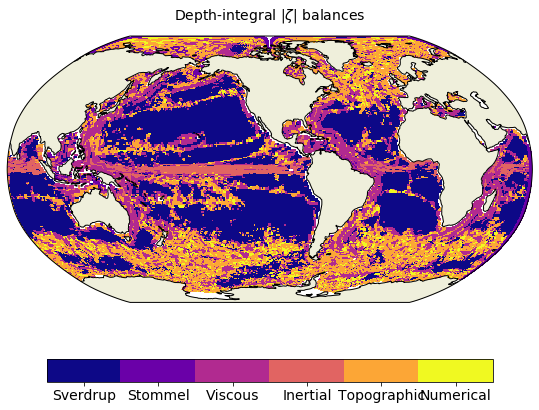

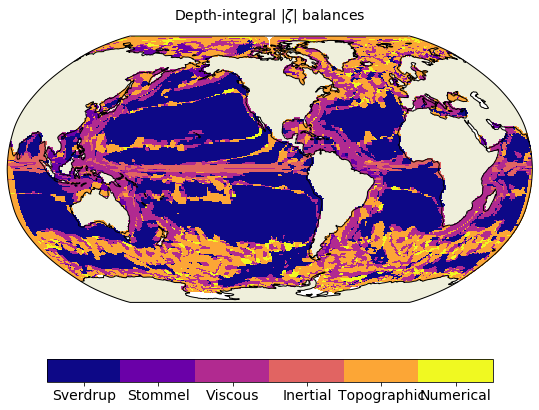

In [34]:
# Depth-integral vorticity balances
title='Depth-integral $|\zeta|$ balances'
file='Z_int_balances'

ax,cbar=global_map(x,y,balances.ztrd_int_balances,levs6,unit,title,colorbar,file,projection)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Sverdrup","Stommel","Viscous","Inertial","Topographic","Numerical"])
plt.savefig(file+'.png')

ax,cbar=global_map(x,y,balances_s.ztrd_int_balances,levs6,unit,title,colorbar,file+'_smooth',projection)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Sverdrup","Stommel","Viscous","Inertial","Topographic","Numerical"])
plt.savefig(file+'_smooth.png')

## Barotropic vorticity balance

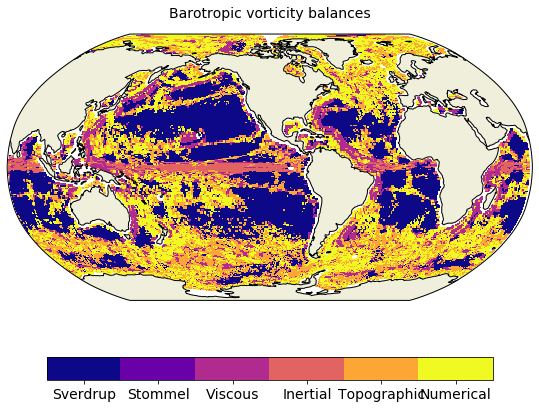

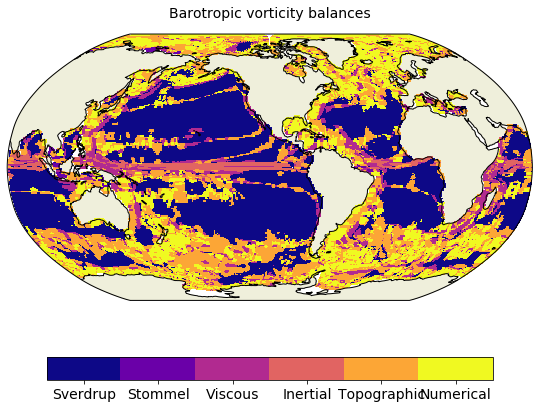

In [35]:
# Barotropic vorticity balances
title='Barotropic vorticity balances'
file='BV_balances'

ax,cbar=global_map(x,y,balances.curl_utrd_int_balances,levs6,unit,title,colorbar,file,projection)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Sverdrup","Stommel","Viscous","Inertial","Topographic","Numerical"])
plt.savefig(file+'.png')

ax,cbar=global_map(x,y,balances_s.curl_utrd_int_balances,levs6,unit,title,colorbar,file+'_smooth',projection)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Sverdrup","Stommel","Viscous","Inertial","Topographic","Numerical"])
plt.savefig(file+'_smooth.png')

## Balance for the vorticity of the depth-average momentum equation

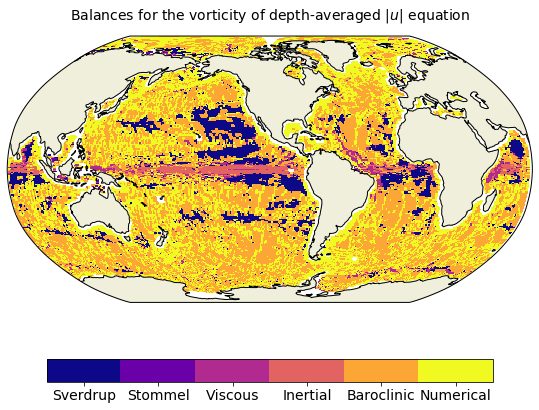

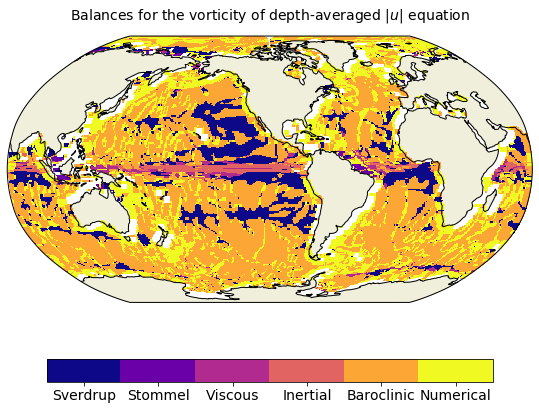

In [38]:
# Vorticity of the depth-averaged momentum balance
title='Balances for the vorticity of depth-averaged $|u|$ equation'
file='Z_av_balances'

ax,cbar=global_map(x,y,balances.curl_utrd_av_balances,levs6,unit,title,colorbar,file,projection)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Sverdrup","Stommel","Viscous","Inertial","Baroclinic","Numerical"])
plt.savefig(file+'.png')

ax,cbar=global_map(x,y,balances_s.curl_utrd_av_balances,levs6,unit,title,colorbar,file+'_smooth',projection)
cbar.set_ticks(range(0,6))
cbar.set_ticklabels(["Sverdrup","Stommel","Viscous","Inertial","Baroclinic","Numerical"])
plt.savefig(file+'_smooth.png')

## Balance for the vorticity of the transport momentum equation

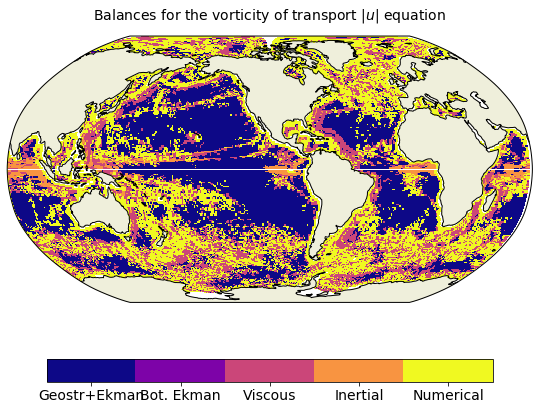

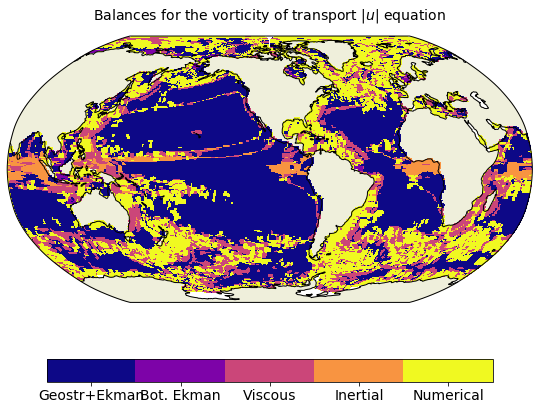

In [39]:
# Depth-integral vorticity balances
title='Balances for the vorticity of transport $|u|$ equation'
file='Z_transp_balances'

ax,cbar=global_map(x,y,balances.curl_utrd_transp_balances,levs5,unit,title,colorbar,file,projection)
cbar.set_ticks(range(0,5))
cbar.set_ticklabels(["Geostr+Ekman","Bot. Ekman","Viscous","Inertial","Numerical"])
plt.savefig(file+'.png')

ax,cbar=global_map(x,y,balances_s.curl_utrd_transp_balances,levs5,unit,title,colorbar,file+'_smooth',projection)
cbar.set_ticks(range(0,5))
cbar.set_ticklabels(["Geostr+Ekman","Bot. Ekman","Viscous","Inertial","Numerical"])
plt.savefig(file+'_smooth.png')